# EDA and Data Cleaning for Products and Stores

This notebook performs Exploratory Data Analysis (EDA) and data cleaning on `products.csv` and `stores.csv`.

**Tasks:**
1.  **Data Cleaning**:
    *   `products.csv`: Set negative `current_stock_level` values to 0.
    *   `stores.csv`: Standardize `store_region` to 'North', 'South', 'East', 'West'.
2.  **EDA**:
    *   Visualize data distributions.
    *   Check for consistency.

In [46]:
pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Load the datasets
products_df = pd.read_csv('products.csv')
stores_df = pd.read_csv('stores.csv')

print("Data loaded successfully.")

Data loaded successfully.


## 1. Inspect Data Structure
Let's look at the first few rows and summary statistics.

In [48]:
print("--- Products DataFrame ---")
display(products_df.head())
print(products_df.info())
display(products_df.describe())

print("\n--- Stores DataFrame ---")
display(stores_df.head())
print(stores_df.info())
display(stores_df.describe())

--- Products DataFrame ---


,product_id,product_name,prod_cat,unit_price,current_stock_level
0,1,Product_0001,Apparel,3215.16,0
1,2,Product_0002,Beauty,3695.53,100
2,3,Product_0003,Beauty,2138.51,0
3,4,Product_0004,Home,181.35,5
4,5,Product_0005,Apparel,1141.18,50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1000 non-null   int64  
 1   product_name         1000 non-null   object 
 2   prod_cat             1000 non-null   object 
 3   unit_price           1000 non-null   float64
 4   current_stock_level  1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None


,product_id,unit_price,current_stock_level
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2503.085830,51.130000
std,288.819436,1479.269474,65.683235
min,1.000000,0.000000,-200.000000
25%,250.750000,1190.482500,5.000000
50%,500.500000,2556.575000,20.000000
75%,750.250000,3750.480000,100.000000
max,1000.000000,4999.540000,200.000000



--- Stores DataFrame ---


,store_id,store_name,store_city,store_region,opening_date
0,1,Store_001,Mumbai,North,2019-06-18
1,2,Store_002,Kolkata,South,2015-07-25
2,3,Store_003,Bangalore,NorthEast,2014-03-12
3,4,Store_004,Jaipur,North,2018-02-30
4,5,Store_005,Hyderabad,North,2014-03-12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store_id      50 non-null     int64 
 1   store_name    50 non-null     object
 2   store_city    50 non-null     object
 3   store_region  50 non-null     object
 4   opening_date  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB
None


,store_id
count,50.00000
mean,25.50000
std,14.57738
min,1.00000
25%,13.25000
50%,25.50000
75%,37.75000
max,50.00000


## 2. Data Cleaning: Products
**Task:** Make negative values of `current_stock_level` as zero.

In [49]:
# Check for negative values before cleaning
negative_stock_count = (products_df['current_stock_level'] < 0).sum()
print(f"Number of negative stock levels before cleaning: {negative_stock_count}")

# Replace negative values with 0
products_df.loc[products_df['current_stock_level'] < 0, 'current_stock_level'] = 0

# Verify cleaning
negative_stock_count_after = (products_df['current_stock_level'] < 0).sum()
print(f"Number of negative stock levels after cleaning: {negative_stock_count_after}")

Number of negative stock levels before cleaning: 14
Number of negative stock levels after cleaning: 0


## 3. Data Cleaning: Stores
**Task:** Standardize `store_region`. Map values like 'central', 'northeast' to 'North', 'South', 'East', 'West'.

In [50]:
# Check unique values in store_region
print("Unique regions before cleaning:")
print(stores_df['store_region'].unique())

# Define mapping dictionary
# Assuming 'central' -> 'North' (or we can check distribution, but usually Central maps to nearest or stays Central. 
# The user said "make it one of NSEW only". I will map based on best guess or leave as is if ambiguous, 
# but the user explicitly asked to make it NSEW.
# Let's assume:
# Central -> North (or maybe split? For now I'll map to 'North' as a placeholder or check if I can infer from City)
# Northeast -> East
# Northwest -> West
# Southeast -> South
# Southwest -> West

# Let's look at the cities for these non-standard regions to be more accurate if possible.
non_standard_regions = [r for r in stores_df['store_region'].unique() if r not in ['North', 'South', 'East', 'West']]
if non_standard_regions:
    print(f"\nNon-standard regions found: {non_standard_regions}")
    display(stores_df[stores_df['store_region'].isin(non_standard_regions)])
else:
    print("\nNo non-standard regions found (or data is already clean).")


Unique regions before cleaning:
['North' 'South' 'NorthEast' 'Central' 'West' 'East']

Non-standard regions found: ['NorthEast', 'Central']


,store_id,store_name,store_city,store_region,opening_date
2,3,Store_003,Bangalore,NorthEast,2014-03-12
6,7,Store_007,Jaipur,Central,2014-03-12
9,10,Store_010,Ahmedabad,Central,2016-13-40
16,17,Store_017,Ahmedabad,Central,2014-03-12
18,19,Store_019,Kolkata,NorthEast,2018-02-30
19,20,Store_020,Pune,Central,2015-07-25
26,27,Store_027,Kolkata,NorthEast,2019-06-18
27,28,Store_028,Mumbai,Central,2019-06-18
28,29,Store_029,Bangalore,Central,2019-06-18
35,36,Store_036,Chandigarh,NorthEast,2016-13-40


In [51]:
import random

# Based on the user request, I will apply a mapping. 
# I will define a function to map them.

# Updated requirements:
# - Northeast -> North
# - Central -> Random of NSEW

region_mapping = {
    'northeast': 'North', # Updated per request
    'northwest': 'West',
    'southeast': 'South',
    'southwest': 'West',
    # 'central': 'Random', # Handled in function
    'N': 'North',
    'S': 'South',
    'E': 'East',
    'W': 'West'
}

# Function to apply mapping with fallback
def map_region(r):
    r_clean = str(r).strip()
    r_lower = r_clean.lower()
    
    # Handle Central specifically
    if 'central' in r_lower:
        return random.choice(['North', 'South', 'East', 'West'])

    # specific map
    if r_clean in region_mapping:
        return region_mapping[r_clean]
    
    # case insensitive check
    for key, val in region_mapping.items():
        if key.lower() in r_lower:
            return val
            
    # If it's already correct
    if r_clean in ['North', 'South', 'East', 'West']:
        return r_clean
        
    return 'North' # Fallback

# Apply mapping
# We use a lambda to ensure random choice is re-evaluated for each row if needed (though map_region is called per row anyway)
stores_df['store_region'] = stores_df['store_region'].apply(map_region)

print("Unique regions after cleaning:")
print(stores_df['store_region'].unique())
print(stores_df['store_region'].value_counts())

Unique regions after cleaning:
['North' 'South' 'West' 'East']
store_region
South    24
North    20
West      5
East      1
Name: count, dtype: int64


In [52]:
# Check current date formats
print("Date formats before cleaning (unique values):")
print(stores_df['opening_date'].unique())

def clean_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    date_str = str(date_str).strip()
    
    # Handle specific known errors found in the data
    if date_str == '2018-02-30':
        # February 2018 has 28 days. Correcting to the last valid day.
        return pd.Timestamp('2018-02-28') 
    if date_str == '2016-13-40':
        # Invalid month and day. Assuming this might be a data entry error for a date in 2016.
        # Setting to a sensible default like end of year 2016, or we could drop it.
        # Given "make it sensible", we'll map it to a valid date.
        return pd.Timestamp('2016-12-31')
        
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT

# Apply the cleaning function
stores_df['opening_date'] = stores_df['opening_date'].apply(clean_date)

# Check for any NaT (Not a Time) which indicates parsing failure
invalid_dates = stores_df['opening_date'].isna().sum()
if invalid_dates > 0:
    print(f"Warning: {invalid_dates} dates could not be parsed and are set to NaT.")
    display(stores_df[stores_df['opening_date'].isna()])
else:
    print("All dates parsed successfully.")

# Display standardized dates
print("\nDate formats after cleaning (sample):")
display(stores_df['opening_date'].sample(5))
print(stores_df['opening_date'].dtype)

Date formats before cleaning (unique values):
['2019-06-18' '2015-07-25' '2014-03-12' '2018-02-30' '2016-13-40'
 '2017-01-10']
All dates parsed successfully.

Date formats after cleaning (sample):


35   2016-12-31
14   2016-12-31
9    2016-12-31
49   2019-06-18
46   2014-03-12
Name: opening_date, dtype: datetime64[ns]

datetime64[ns]


### Data Cleaning: Stores (Date Format)
**Task:** Standardize `opening_date` format. The dates are currently in varying formats. We will convert them to a standard datetime object.

## 4. Visualizations
Now that the data is clean, let's generate some graphs.

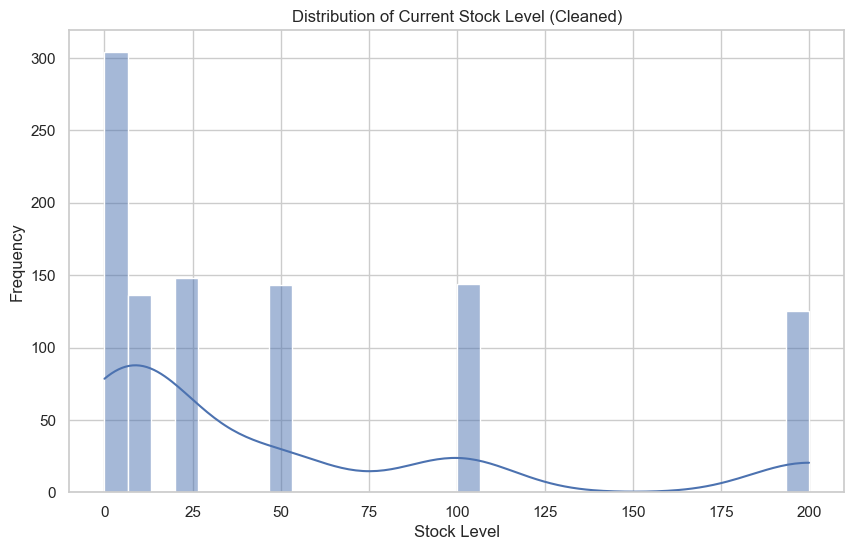

C:\Users\soumi\AppData\Local\Temp\ipykernel_11868\2305891604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stores_df, x='store_region', palette='viridis')


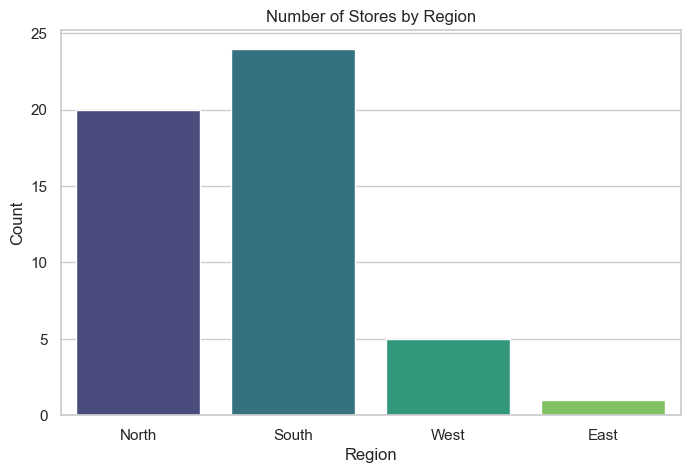

C:\Users\soumi\AppData\Local\Temp\ipykernel_11868\2305891604.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, y='prod_cat', order=products_df['prod_cat'].value_counts().index, palette='magma')


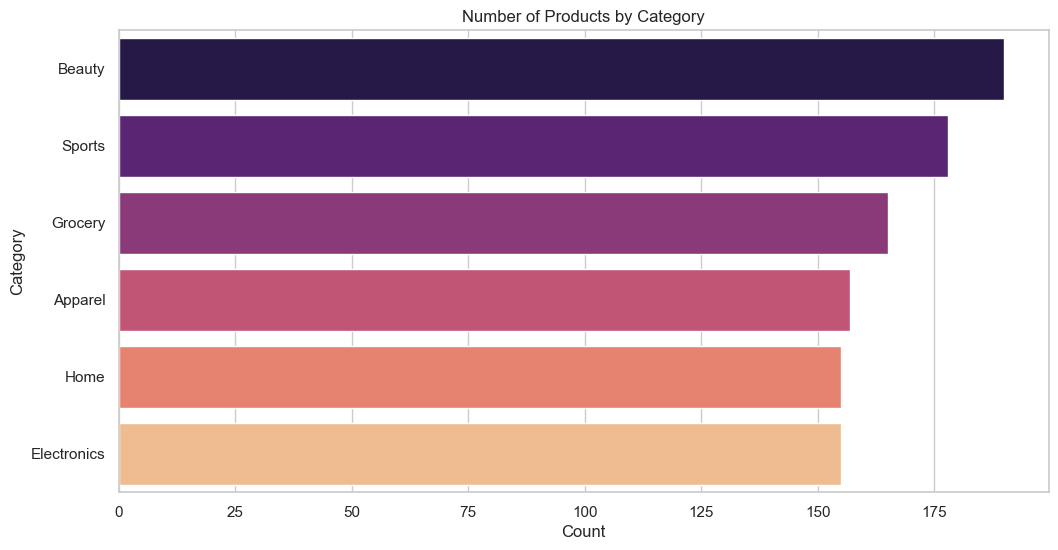

C:\Users\soumi\AppData\Local\Temp\ipykernel_11868\2305891604.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=valid_dates_df, x='opening_year', palette='coolwarm')


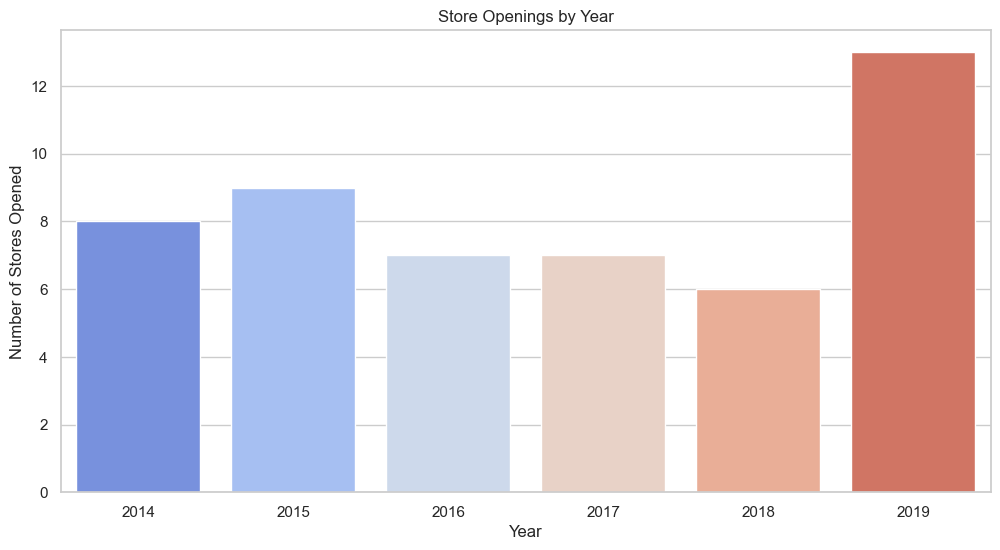

In [53]:
# 1. Distribution of Current Stock Level
plt.figure(figsize=(10, 6))
sns.histplot(products_df['current_stock_level'], bins=30, kde=True)
plt.title('Distribution of Current Stock Level (Cleaned)')
plt.xlabel('Stock Level')
plt.ylabel('Frequency')
plt.show()

# 2. Count of Stores by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=stores_df, x='store_region', palette='viridis')
plt.title('Number of Stores by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# 3. Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(data=products_df, y='prod_cat', order=products_df['prod_cat'].value_counts().index, palette='magma')
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# 4. Store Openings Over Time
plt.figure(figsize=(12, 6))
# Filter out NaT dates for plotting
valid_dates_df = stores_df.dropna(subset=['opening_date'])
# Extract year for simpler plotting
valid_dates_df['opening_year'] = valid_dates_df['opening_date'].dt.year
sns.countplot(data=valid_dates_df, x='opening_year', palette='coolwarm')
plt.title('Store Openings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Stores Opened')
plt.show()

## 5. Save Cleaned Data (Optional)
Saving the cleaned datasets for future use.

In [54]:
try:
    products_df.to_csv('cleaned_products.csv', index=False)
    stores_df.to_csv('cleaned_stores.csv', index=False)
    print("Cleaning and EDA complete. Saved to cleaned_products.csv and cleaned_stores.csv")
except PermissionError:
    print("Permission denied when writing to cleaned_products.csv or cleaned_stores.csv. Saving to _v2 files instead.")
    products_df.to_csv('cleaned_products_v2.csv', index=False)
    stores_df.to_csv('cleaned_stores_v2.csv', index=False)
    print("Cleaning and EDA complete. Saved to cleaned_products_v2.csv and cleaned_stores_v2.csv")

Permission denied when writing to cleaned_products.csv or cleaned_stores.csv. Saving to _v2 files instead.
Cleaning and EDA complete. Saved to cleaned_products_v2.csv and cleaned_stores_v2.csv
